In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [2]:
 test = pd.read_csv("D:\great learning\EDA by Python\BIG MART SALES PREDICTION BY USING R//Test_u94Q5KV.csv")

In [3]:
train = pd.read_csv("D://great learning//EDA by Python//BIG MART SALES PREDICTION BY USING R//Train_UWu5bXk.csv")

In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

C:\Users\Lenovo\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


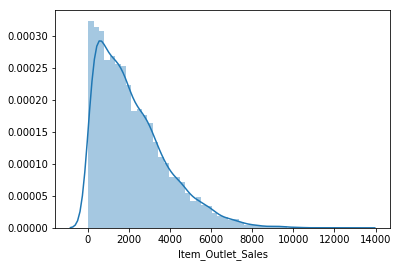

In [9]:
# target variable outlet sale / univariant 
sns.distplot(train.Item_Outlet_Sales)

In [10]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [11]:
train.columns

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'Item_Outlet_Sales'],
      dtype='object')

In [12]:
a = pd.notnull(train.Item_Weight)

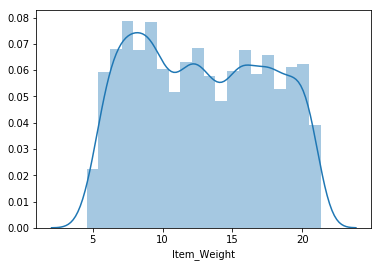

In [13]:
sns.distplot(train[a]["Item_Weight"])

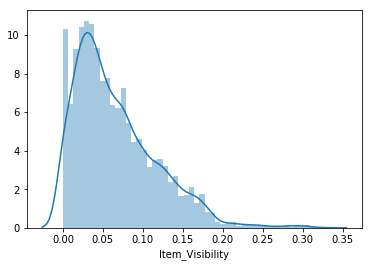

In [14]:
sns.distplot(train.Item_Visibility)

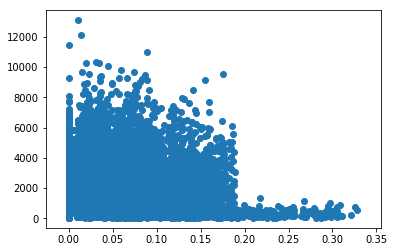

In [15]:
plt.scatter(train.Item_Visibility , train.Item_Outlet_Sales)

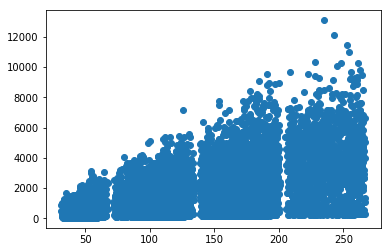

In [16]:
# plot mrp vs outlet
plt.scatter(train.Item_MRP , train.Item_Outlet_Sales)

In [17]:
train["Item_price"] = train.Item_MRP/train.Item_Weight

In [18]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_price
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


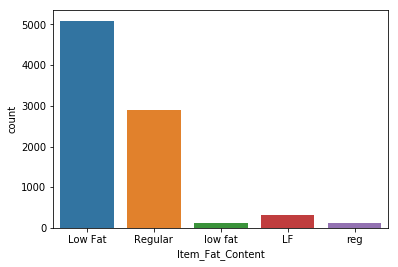

In [19]:
sns.countplot(train.Item_Fat_Content)

In [20]:
# making the copy of the data. 
train.Item_Fat_Content.replace(to_replace=["LF","low fat","reg"],
                              value = ["Low Fat" , "Low Fat" , "Regular"],inplace = True)

In [21]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

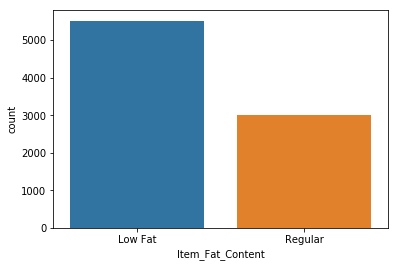

In [22]:
sns.countplot(train.Item_Fat_Content)

In [23]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

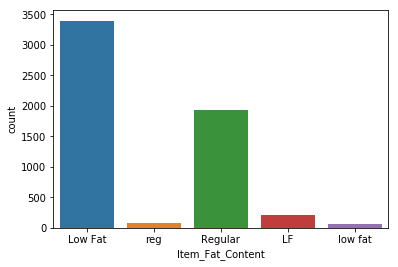

In [24]:
sns.countplot(test.Item_Fat_Content)

In [25]:
test.Item_Fat_Content.replace(to_replace=["LF","low fat","reg"],
                              value = ["Low Fat" , "Low Fat" , "Regular"],inplace = True)

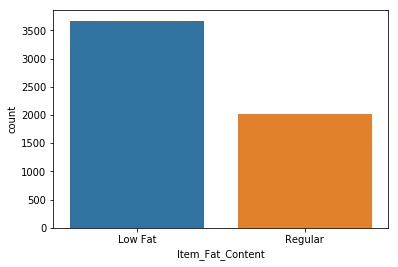

In [26]:
sns.countplot(test.Item_Fat_Content)

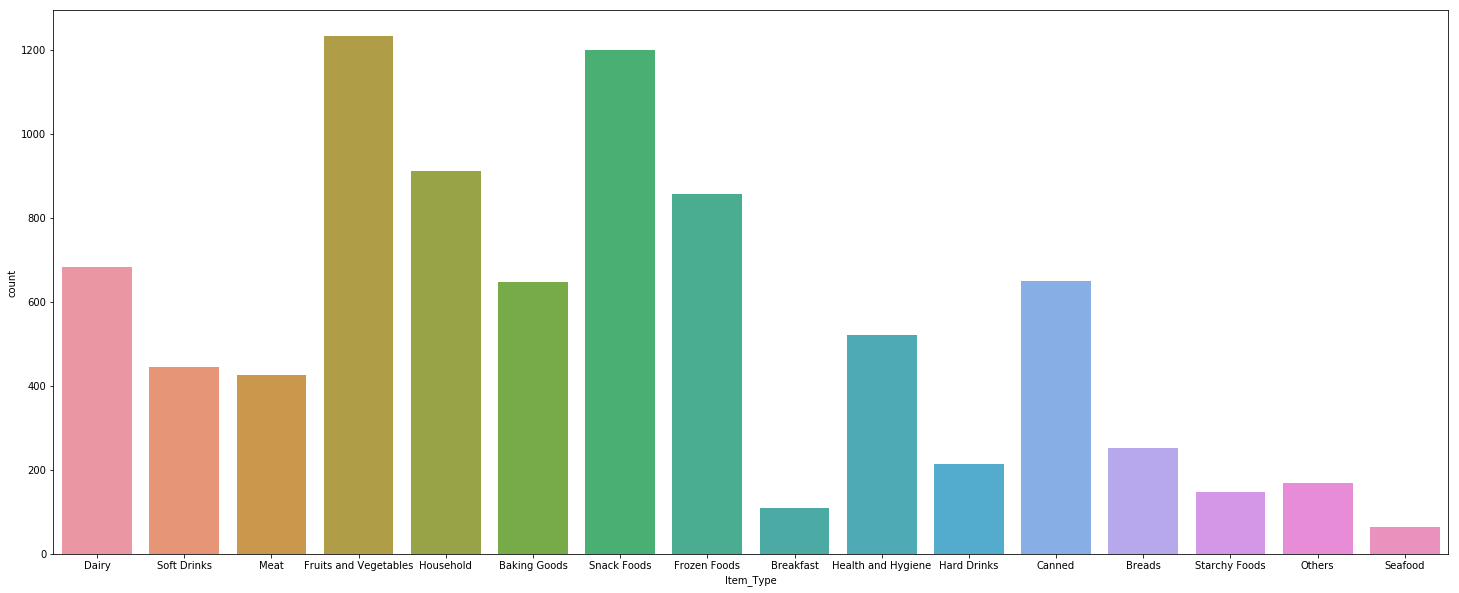

In [27]:
plt.figure(figsize=[25,10])
sns.countplot(train.Item_Type)

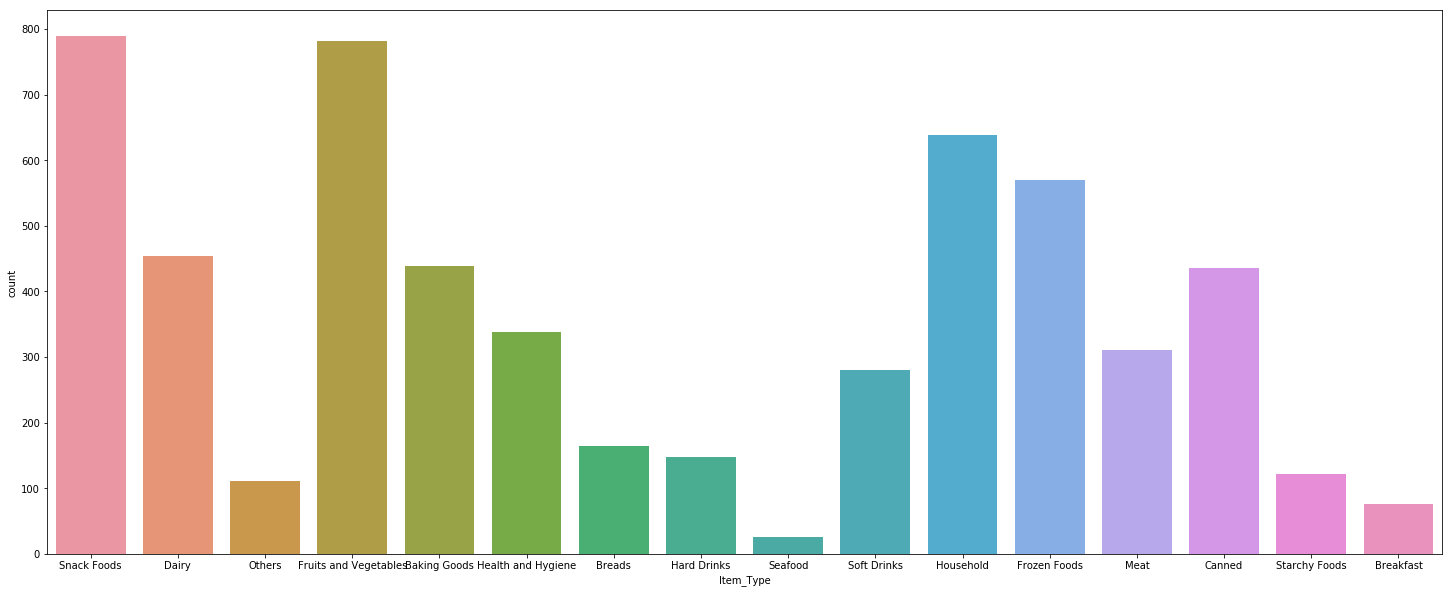

In [28]:
plt.figure(figsize=[25,10])
sns.countplot(test.Item_Type)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

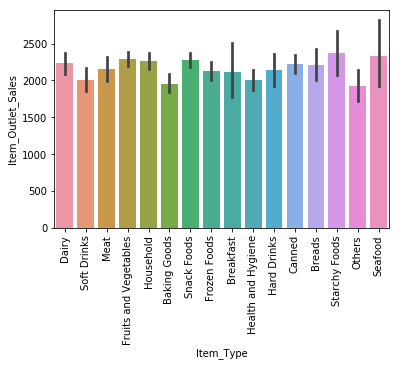

In [29]:
# outlet identifier (catagorical)
sns.barplot(x = "Item_Type" , y = "Item_Outlet_Sales" , data = train)
plt.xticks(rotation = 90)

In [30]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [31]:
train.Item_Weight.fillna(value = 12.6,inplace = True)

In [32]:
train.Item_Weight[train.Item_Identifier=="NCD19"]

4       8.93
522     8.93
802     8.93
2129    8.93
2907    8.93
3428    8.93
Name: Item_Weight, dtype: float64

In [33]:
newtrain = train.groupby("Item_Identifier").transform(lambda x : x.fillna(x.notnull().mean()))

In [34]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_price
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0.666667,Tier 3,Grocery Store,732.3800,9.484115
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512


In [35]:
newtrain.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_price                   0
dtype: int64

In [36]:
newtrain.columns

Index([u'Item_Weight', u'Item_Fat_Content', u'Item_Visibility', u'Item_Type',
       u'Item_MRP', u'Outlet_Identifier', u'Outlet_Establishment_Year',
       u'Outlet_Size', u'Outlet_Location_Type', u'Outlet_Type',
       u'Item_Outlet_Sales', u'Item_price'],
      dtype='object')

In [37]:
train.Item_Weight.fillna(value = 12.6,inplace = True)
test.Item_Weight.fillna(value = 12.6,inplace = True)

In [38]:
# itme visibility 
train.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [39]:
train.Item_Visibility.replace(to_replace=0 , value = 0.053931 , inplace = True)

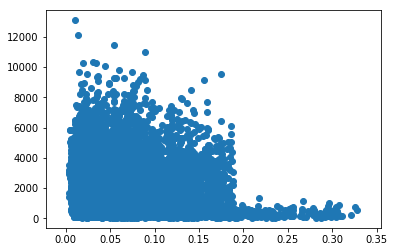

In [40]:
plt.scatter(train.Item_Visibility , train.Item_Outlet_Sales)

In [41]:
test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [78]:
test.Outlet_Size.fillna(value = "1862" , inplace = True)

In [79]:
test.Item_Visibility.replace(to_replace=0 , value = 0.053931 , inplace = True)

In [80]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Price_per_Unit               0
dtype: int64

In [81]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_Unit
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Median,Tier 2,Supermarket Type1,10.520458
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Median,Tier 3,Grocery Store,16.558479
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Median,Tier 2,Supermarket Type1,21.193985
4,FDY38,12.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,18.589683


In [82]:
test["Price_per_Unit"] = test.Item_MRP/test.Item_Weight

In [83]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_Unit
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Median,Tier 2,Supermarket Type1,10.520458
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Median,Tier 3,Grocery Store,16.558479
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Median,Tier 2,Supermarket Type1,21.193985
4,FDY38,12.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,18.589683


In [84]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Price_per_Unit               0
dtype: int64

# feature engineering 
1) price per unit 
2) itemid

In [85]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_price,itemid
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,FD
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC


In [86]:
train.Item_Identifier.nunique()

1559

In [87]:
# we can extract first two letters of id which have significant relation with item type.
train.Item_Identifier[1][0:3]

'DRC'

In [88]:
itemid = []
for i in range (0,8523):
    itemid.append(train.Item_Identifier[i][0:2])

In [89]:
itemid

['FD',
 'DR',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'DR',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'NC',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'DR',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'NC',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'DR',
 'NC',
 'FD',
 'NC',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'NC',
 'NC',
 'NC',

In [90]:
train["itemid"] = pd.Series(itemid)

In [91]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_price,itemid
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,FD
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC


In [92]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [93]:
train.columns

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'Item_Outlet_Sales', u'Item_price', u'itemid'],
      dtype='object')

In [94]:
test.columns

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'Price_per_Unit'],
      dtype='object')

scale the data 

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
# delete the item id from train and test 
newtrain = train.drop("Item_Identifier" , axis = 1)

In [97]:
newtest = test.drop("Item_Identifier" , axis = 1)

In [98]:
newtrain

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_price,itemid
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,FD
3,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,FD
4,8.930,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,NC
5,10.395,Regular,0.053931,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4.944762,FD
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,4.224088,FD
7,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,NaN,FD
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,5.985963,FD
9,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,9.782365,FD


In [99]:
newtrain = newtrain.drop("Outlet_Establishment_Year",axis=1)

In [100]:
# get dummies 
ohe_train = pd.get_dummies(newtrain)

In [105]:
ohe_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_price,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,itemid_DR,itemid_FD,itemid_NC
0,9.30,0.016047,249.8092,3735.1380,26.861204,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,8.153581,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,8.092457,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.053931,182.0950,732.3800,9.484115,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.053931,53.8614,994.7052,6.031512,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [66]:
ohe_test = pd.get_dummies(newtest)

In [67]:
sc = StandardScaler()

In [68]:
ohe_test.shape

(5681, 44)

In [69]:
scaled_test = pd.DataFrame(sc.fit_transform(ohe_test),columns = ohe_test.columns)

C:\Users\Lenovo\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lenovo\Anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [70]:
scaled_train = pd.DataFrame(sc.fit_transform(ohe_train),columns = ohe_train.columns)

C:\Users\Lenovo\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lenovo\Anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [71]:
scaled_test.shape

(5681, 44)

In [72]:
scaled_train.shape

(8523, 46)

In [73]:
tr  = DecisionTreeClassifier() 

In [74]:
x = scaled_train.drop("Item_Outlet_Sales" , axis=1)
y = scaled_train.Item_Outlet_Sales

In [75]:
tr.fit(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').